In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
class LinearRegressor: #multivariate
    def __init__(self,learn_rate=0.5,n_iter=1500):
        self.w = 0
        self.b = 0
        self.learn_rate = learn_rate
        self.n_iter = n_iter
        self.cost_history = []
    
    def cost(self,x,y,y_pred):
        return 1/2*len(x)*(np.sum((y_pred-y)**2))

    def fit(self,x,y):
        n = len(x)
        features = x.shape[1]
        # weight matrix with the same no.of columns as the features
        self.w = np.zeros(x.shape[1])

        for i in range(self.n_iter):
            y_pred = np.dot(x,self.w) + self.b
            self.cost_history.append(self.cost(x,y,y_pred))
            error = y_pred-y

            djdw = (1/n)*(np.dot(x.T,error))
            djdb = (1/n)*(np.sum(error))

            self.w -= self.learn_rate*djdw
            self.b -= self.learn_rate*djdb      
    
    def predict(self,x):
        return np.dot(x,self.w) + self.b
    
    def mse(self,y,y_pred):
        return np.mean((y-y_pred)**2)     

In [45]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [47]:
x = dataset.data 
x
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [48]:
y = dataset.target 
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.33,random_state=42)

In [50]:
model = LinearRegressor()
model.fit(x_train,y_train)

In [51]:
pred = model.predict(x_valid)
pred[0:5]

array([0.72563462, 1.76650223, 2.70545812, 2.83325416, 2.60410135])

In [52]:
y_valid[0:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [53]:
model.mse(y_valid,pred)

0.5369686543372462

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_valid,pred)
r2

0.5970494128783952

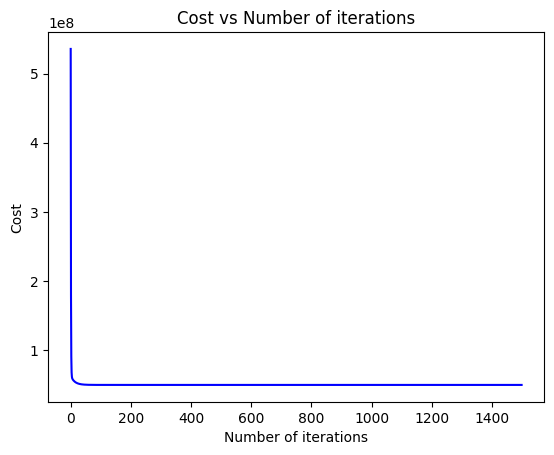

In [55]:
import matplotlib.pyplot as plt
nb = np.arange(1500)
j = model.cost_history
plt.plot(nb,j,color='b')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()